# <center><strong> Vlib (Bike rental) </strong></center>

###### **By Mohamed Jamyl**

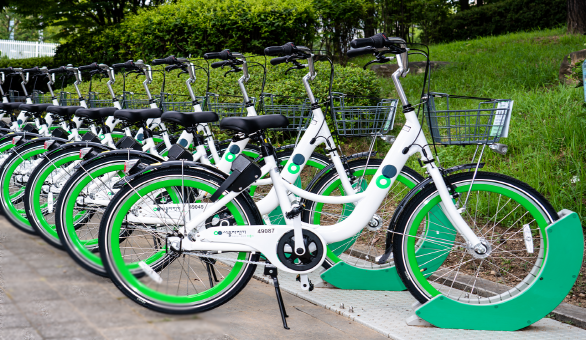

In [7]:
from IPython.display import Image
Image(filename='bi.png')

## <center><strong> Project Overview </strong></center>

### Bike share systems are a way to rent bikes where the process of obtaining membership, renting and returning bikes is automated through a network of kiosks located throughout the city. Through these systems, people can rent a bike from one location and return it to another location based on their needs. Currently, there are more than 500 bike share programs around the world.

---------------------------------
---------------------------------
---------------------------------

## **Import Libraries** 

In [1]:
import pylab
import calendar

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import math
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
from IPython.display import Image


pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

----------------------------------
----------------------------------

## **Exploratory Data Analysis (EDA)**

### **Initial Data Understanding**

 - **Data loading and Inspection**
 - **Data Types**
 - **Missing Values**
 - **Duplicates**

In [2]:
df = pd.read_csv("vlib.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
df.shape

(10886, 12)

In [4]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

-----------------------

### **Basic Statistical Overview**
- Summary Statistical : **describe()**

In [11]:
df.iloc[:, :-1].describe().T.sort_values(by='std' , ascending = False).style.background_gradient(cmap='GnBu').bar(subset=["max"], color='#BB0000').bar(subset=["mean",], color='green') 

,count,mean,std,min,25%,50%,75%,max
registered,10886.000000,155.552177,151.039033,0.000000,36.000000,118.000000,222.000000,886.000000
casual,10886.000000,36.021955,49.960477,0.000000,4.000000,17.000000,49.000000,367.000000
humidity,10886.000000,61.886460,19.245033,0.000000,47.000000,62.000000,77.000000,100.000000
atemp,10886.000000,23.655084,8.474601,0.760000,16.665000,24.240000,31.060000,45.455000
windspeed,10886.000000,12.799395,8.164537,0.000000,7.001500,12.998000,16.997900,56.996900
temp,10886.000000,20.230860,7.791590,0.820000,13.940000,20.500000,26.240000,41.000000
season,10886.000000,2.506614,1.116174,1.000000,2.000000,3.000000,4.000000,4.000000
weather,10886.000000,1.418427,0.633839,1.000000,1.000000,1.000000,2.000000,4.000000
workingday,10886.000000,0.680875,0.466159,0.000000,0.000000,1.000000,1.000000,1.000000
holiday,10886.000000,0.028569,0.166599,0.000000,0.000000,0.000000,0.000000,1.000000


In [ ]:
# !jupyter nbconvert --to html "Bake rental project.ipynb"

[NbConvertApp] Converting notebook Bake rental project.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 1019859 bytes to Bake rental project.html
